# Задача 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

 zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
 
 ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [142]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [143]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

y = b1 * x + b0, где b0 - интерсепт, показывающий в каком месте прямая пересекает ось y, а b1 - коэффициент, отвечающий за наклон этой прямой.

Связь между заработной платой и кредитным скорингом можно описать функцией: 
 y = 2.620538882402765 * x + 444.1773573243596

Интерсепт = 444.1773573243596
Наклон = 2.620538882402765
Коэффициент корреляции Пирсона = 0.8874900920739162
Коэффициент детерминации = 0.7876386635293682


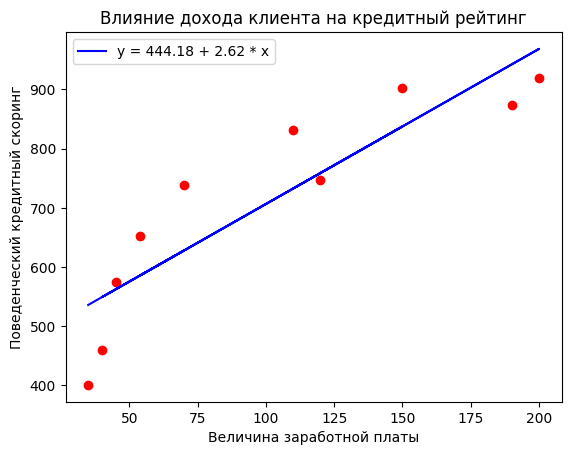

In [144]:
b1 = (np.mean(zp * ks) - np.mean(ks) * np.mean(zp)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b0 = np.mean(ks) - b1 * np.mean(zp)
print(f'Связь между заработной платой и кредитным скорингом можно описать функцией: \n y = {b1} * x + {b0}\n')

plt.scatter(zp, ks, color = "red")
plt.plot(zp, b1 * zp + b0, label=r'y = 444.18 + 2.62 * x', color = 'blue') # нанесли модель линейной регрессии на точечный график
plt.legend()
plt.title('Влияние дохода клиента на кредитный рейтинг')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)

R = np.corrcoef(zp, ks) ** 2 
pirson = np.corrcoef(zp, ks)

print(f'Интерсепт = {b0}')
print(f'Наклон = {b1}')
print(f'Коэффициент корреляции Пирсона = {pirson[0, 1]}')
print(f'Коэффициент детерминации = {R[0, 1]}')


Коэффициент детерминации =  0.7876386635293682.

Это значит, что модель работает корректно лишь с вероятностью 78%, что дает не очень хороший исход событий. Необходимо больше данных для обучения модели. 

In [145]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape((-1, 1))
y =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x,y)
b0 = model.intercept_
b1 = model.coef_

print(f'intersept = {b0} \nslope = {b1}')

intersept = 444.17735732435943 
slope = [2.62053888]


Выведем предсказанные моделью значения кредитного скоринга для заданного уравнения:

In [146]:
y_pred_intercept =  444.1773573243596 + 2.620538882402765 * x
print('predicted response:', y_pred_intercept, sep ='\n')

predicted response:
[[535.89621821]
 [562.10160703]
 [942.07974498]
 [968.2851338 ]
 [548.99891262]
 [627.61507909]
 [585.68645697]
 [837.25818968]
 [758.64202321]
 [732.43663439]]


Построим модель для уравнения без интерсепта и вычислим предсказанные данные по кредитному скорингу снова:

In [147]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape((-1, 1))
y =  np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False).fit(x,y)
b0 = model.intercept_
b1 = model.coef_

print(f'intersept = {b0} \nslope = {b1}')

intersept = 0.0 
slope = [5.88982042]


In [148]:
y_pred = model.predict(x).reshape(-1,1)
print('predicted response:', y_pred, sep ='\n')

predicted response:
[[ 206.1437147 ]
 [ 265.04191891]
 [1119.06587983]
 [1177.96408403]
 [ 235.59281681]
 [ 412.28742941]
 [ 318.05030269]
 [ 883.47306302]
 [ 706.77845042]
 [ 647.88024621]]


Сравним на графике линии 2-х моделей (с учетом интерсепта и без):

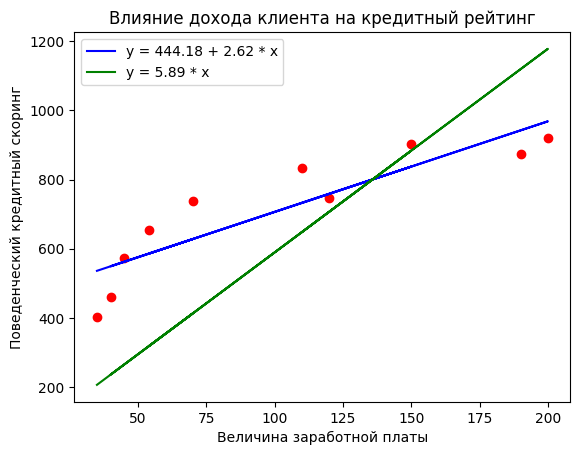

In [149]:
plt.scatter(x, y, color = 'red')
plt.title('Влияние дохода клиента на кредитный рейтинг')
plt.plot(x, y_pred_intercept, label=r'y = 444.18 + 2.62 * x', color = 'blue')
plt.plot(x, y_pred, label=r'y = 5.89 * x', color = 'green')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг');

Модель без интерсепта показала результат хуже, чем модель с учетом ненулевого интерсепта и коэффициента наклона. Прямая без интерспета проходит на бОльшем расстоянии от построенных точек на графике по имеющимся данным.

# Задача 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

y = b1 * x, 

где y - кредитный скоринг, а x - величина заработной платы (независимая величина).

Среднеквадратичная функция потерь:

In [156]:
def _mse(b1, x, y):
    return np.sum((b1 * x - y)**2)/len(x)

Функция потерь для коэффициента b1 = 2.62:

In [157]:
_mse(2.62, zp, ks)

203812.48504

Вычислим производную функции потерь, чтобы найти значение коэффициента b1, при котором функция потерь будет стремиться к 0:

In [165]:
def _mse_p(b1, x, y):
    return (2/len(x))*np.sum((b1 * x - y)*x)

In [164]:
alpha = 0.000001  # скорость обучения модели

In [166]:
b1 = 0.1
mse_min=_mse(b1, zp, ks)
i_min=1
b1_min=b1
for i in range(10000):
    b1-=alpha*_mse_p(b1, zp, ks)
    if i%100==0:
        print(f'Итерация #{i}, b1={b1}, mse={_mse(b1, zp, ks)}')
    if _mse(b1, zp, ks)>mse_min:
        print(f'Итерация #{i_min}, b1={b1_min}, mse={mse_min},\n ! Минимум.')
        break
    else:
        mse_min=_mse(b1, zp, ks)
        i_min=i
        b1_min=b1

b1_min        

Итерация #0, b1=0.25952808000000005, mse=493237.7212546963
Итерация #100, b1=5.54537842245223, mse=58151.31823171113
Итерация #200, b1=5.868748638669329, mse=56522.97550129376
Итерация #300, b1=5.888531320728348, mse=56516.88130936019
Итерация #400, b1=5.8897415574471985, mse=56516.85850140053
Итерация #500, b1=5.889815595583751, mse=56516.858416040064
Итерация #600, b1=5.889820124983314, mse=56516.85841572062
Итерация #628, b1=5.889820285147628, mse=56516.85841571966,
 ! Минимум.


5.889820285147628

# Задача 3.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

y = b1 * x + b0, 

где y - кредитный скоринг, а x - величина заработной платы (независимая величина).

In [172]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Функция потерь:

In [173]:
def _mse_b0b1(b0, b1, x, y):
    return np.sum(((b0 + b1 * x)-y)**2)/len(x)

Производная по intercept

In [174]:
def _mse_pb0(b0, b1, x, y): 
    return 2*np.sum((b0 + b1 * x)-y)/len(x)

Производная по slope

In [175]:
def _mse_pb1(b0, b1, x, y):
    return 2*np.sum(((b0 + b1 * x)-y)*x)/len(x)

In [176]:
alpha=5e-05 # скорость обучения модели

In [177]:
b1 = 0.1
b0 = 0.1
mseb0b1_min=_mse_b0b1(b0, b1, zp, ks)
i_min=1
b1_min= b1
b0_min= b0
for i in range(1000000):
    b0-=alpha*_mse_pb0(b0, b1, zp, ks)
    b1-=alpha*_mse_pb1(b0, b1, zp, ks)
    if i % 50000 == 0:
        print(f'Итерация #{i}, b0={b0}, b1={b1}, mse={_mse_b0b1(b0, b1, zp, ks)}')
    if _mse_b0b1(b0, b1, zp, ks)>mseb0b1_min:
        print(f'Итерация #{i_min},  b0={b0_min}, b1={b1_min}, mse={mseb0b1_min},\n ! Минимум.')
        break
    else:
        mseb0b1_min=_mse_b0b1(b0, b1, zp, ks)
        i_min=i
        b1_min=b1
        b0_min=b0
print(f'b0={b0_min}\nb1={b1_min}')

Итерация #0, b0=0.169966, b1=8.07468054476, mse=122318.06397097567
Итерация #50000, b0=319.27767648420047, b1=3.5398324356503275, mse=10427.569111705801
Итерация #100000, b0=409.0442373734796, b1=2.879127619051743, mse=6783.521961452364
Итерация #150000, b0=434.29473705519484, b1=2.693277491833349, mse=6495.188684804794
Итерация #200000, b0=441.3974680483413, b1=2.6409995775222037, mse=6472.374468908443
Итерация #250000, b0=443.39540029510493, b1=2.62629428586797, mse=6470.569306309746
Итерация #300000, b0=443.95740007610897, b1=2.622157823932053, mse=6470.426473787141
Итерация #350000, b0=444.1154853937451, b1=2.6209942756156086, mse=6470.415172240385
Итерация #400000, b0=444.159953325044, b1=2.6206669802831115, mse=6470.414278011555
Итерация #450000, b0=444.1724617410292, b1=2.6205749151465225, mse=6470.414207256183
Итерация #500000, b0=444.1759802422447, b1=2.6205490180788695, mse=6470.414201657699
Итерация #520164,  b0=444.17653163778414, b1=2.62054495966686, mse=6470.414201349592,

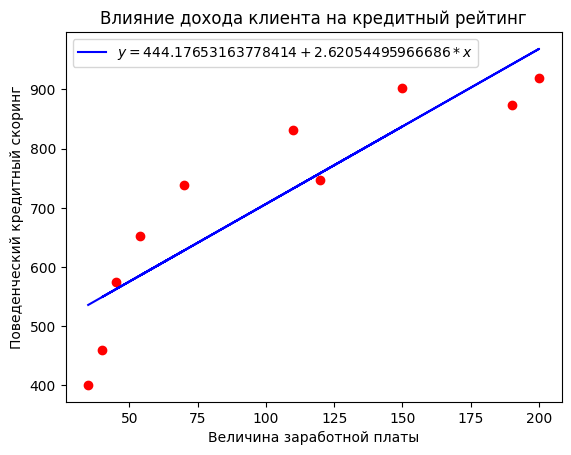

In [183]:
plt.scatter(zp, ks, color = 'red')
plt.title('Влияние дохода клиента на кредитный рейтинг')
plt.plot(zp, b0_min + b1_min * zp, label=r'$y=444.17653163778414+2.62054495966686*x$',  color = 'blue')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90);